In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download snapcrack/all-the-news

 94% 229M/244M [00:02<00:00, 137MB/s]
100% 244M/244M [00:02<00:00, 115MB/s]


In [5]:
! unzip all-the-news.zip

Archive:  all-the-news.zip
  inflating: articles1.csv           
  inflating: articles2.csv           
  inflating: articles3.csv           


In [3]:
import pandas as pd
import numpy as np

In [6]:
a1 = pd.read_csv('articles1.csv',index_col=0)
a2 = pd.read_csv('articles2.csv',index_col=0)
a3 = pd.read_csv('articles3.csv',index_col=0)

In [7]:
df = pd.concat([a1,a2,a3])

In [8]:
df.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [9]:
import matplotlib.pyplot as plt

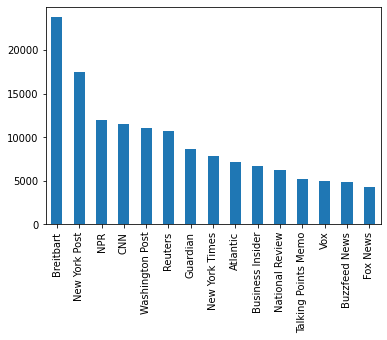

In [10]:
df['publication'].value_counts().plot(kind='bar')

In [24]:
doc = df.loc[0,'content']

In [25]:
doc

'WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been 

In [13]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [14]:
doc = nlp(doc)

In [15]:
displacy.render(doc,style='ent',jupyter=True)

In [22]:
nlp = spacy.load('en',disable=['parser','tagger','textcat'])

In [26]:
doc = nlp(doc)

In [27]:
ents = [(e.text, e.start_char, e.end_char, e.label_)
for e in doc.ents
if len(e.text.strip(' -—')) > 0]

In [33]:
from tqdm import tqdm_notebook
pipelines = []

for i in tqdm_notebook(range(1000)):
  doc = df.loc[i,'content']
  text_id = df.loc[i,'id']
  doc = nlp(doc)
  ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
  pipeline = pd.DataFrame(ents)
  pipeline['id'] = text_id
  pipelines.append(pipeline)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/1000 [00:00<?, ?it/s]

In [34]:
npf = pd.concat(pipelines)
npf.columns = ['Text','Start','Stop','Type','id']

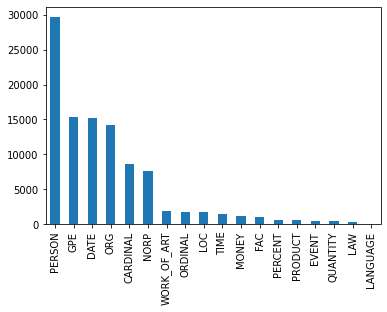

In [38]:
npf.Type.value_counts().plot(kind='bar')

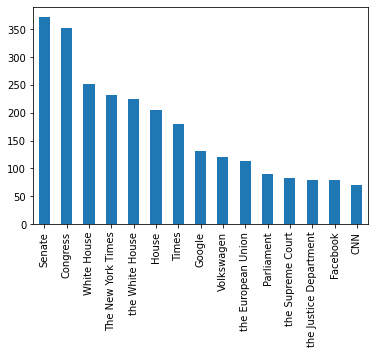

In [39]:
orgs = npf[npf.Type == 'ORG']
orgs.Text.value_counts()[:15].plot(kind='bar')